In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from warnings import filterwarnings
filterwarnings(action='ignore') 

In [2]:
add=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
add.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
add.shape

(200, 5)

In [4]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
add.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#ad=add.drop(['Unnamed: 0'],axis=1)

In [7]:
add.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Exploratary Data Analysis

<AxesSubplot:xlabel='newspaper', ylabel='count'>

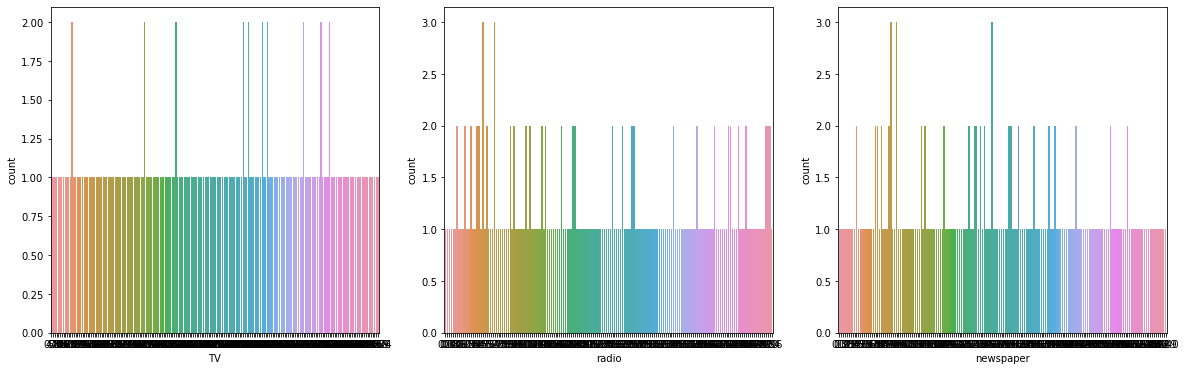

In [8]:
plt.figure(figsize=(20,6))


plt.subplot(131)
ylabel=('sales')
sns.countplot('TV', data=add)

plt.subplot(132)
ylabel=('sales')
sns.countplot('radio',data=add)

plt.subplot(133)
ylabel=('sales')
sns.countplot('newspaper',data=add)


In [9]:
add.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

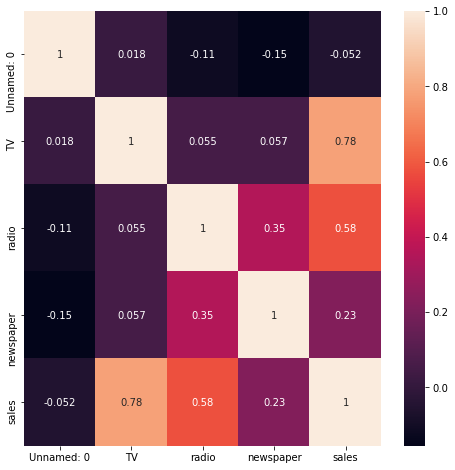

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(add.corr(),annot=True)

In [11]:
x=add.drop('sales', axis=1)
y=add['sales']

In [12]:
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [13]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [14]:
x.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      Unnamed: 0     TV  radio  newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]>

In [15]:
from sklearn.preprocessing import power_transform
add_skew=power_transform(x)

add_skew=pd.DataFrame(add_skew,columns=x.columns)

In [16]:
add_skew.skew()

Unnamed: 0   -0.268270
TV           -0.315199
radio        -0.242968
newspaper    -0.077942
dtype: float64

In [17]:
ad=add_skew

In [18]:
x=add_skew

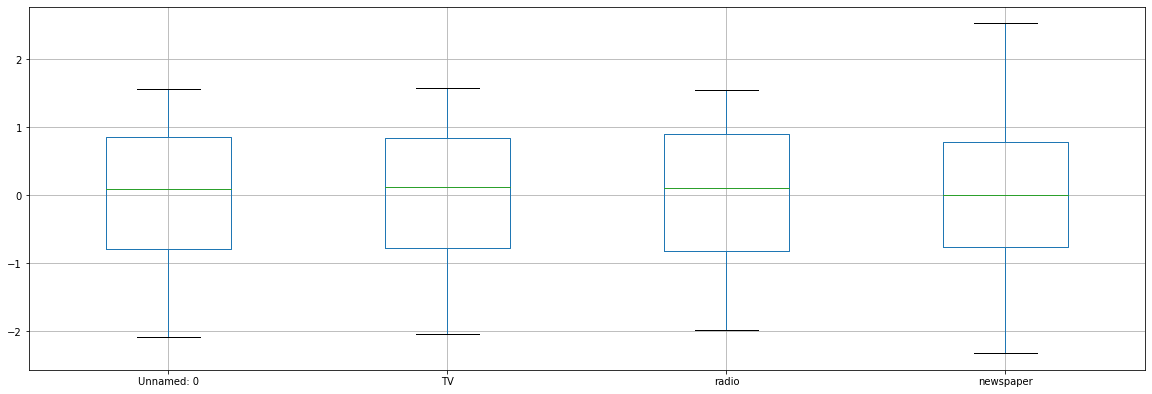

In [19]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df_skew))
add_outlier=df_skew[(z<3).all(axis=1)]

NameError: name 'df_skew' is not defined

In [ ]:
add_outlier.shape

In [ ]:
add.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

In [ ]:
#now will train data at 80% and test at 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2, random_state=100)
print ("X_train: ", x_train)
print ("y_train: ", y_train)
print("X_test: ", x_test)
print ("y_test: ", y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
line=LinearRegression()
line.fit(x_train, y_train)
prediction=line.predict(x_test)
acc_1=round(line.score(x_train, y_train) *100,2)
acc_1


In [ ]:
scr = cross_val_score(line,x,y,cv=5)
print('Cross validation score for linear Regression Model is', scr.mean())

In [ ]:
r1=Ridge()
r1.fit(x_train,y_train)
prediction=r1.predict(x_test)
acc_r=round(r1.score(x_train,y_train)*100,2)
acc_r

In [ ]:
scr = cross_val_score(r1,x,y,cv=5)
print('Cross validation score for Ridge Model is', scr.mean())

In [ ]:
l1=Lasso()
l1.fit(x_train,y_train)
prediction=l1.predict(x_test)
acc_l=round(l1.score(x_train,y_train)*100,2)
acc_l

In [ ]:
scr = cross_val_score(l1,x,y,cv=5)
print('Cross validation score for lasso Model is', scr.mean())

In [ ]:
import joblib
joblib.dump(mod1,"Advertising_Sales_Lasso.pkl")